## Derivative

In [2]:

from typing import Callable
from numpy import ndarray

def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          delta: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the
    "input_" array.
    m = f(a + delta) - f(a - delta) / a + delta - (a - delta)
    m = f(a + delta) - f(a - delta) / 2 delta
    '''
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

In [2]:
from typing import List, Callable
from numpy import ndarray
import numpy as np

# 1. Define the type 'Chain'
# A Chain is a list of functions that take an ndarray and return an ndarray
Chain = List[Callable[[ndarray], ndarray]]

def chain_length_2(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates two functions in a row, in a "Chain".
    '''
    assert len(chain) == 2, \
    "Length of input 'chain' should be 2"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))


def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    # Multiplying these quantities together at each point
    return df1dx * df2du

def chain_deriv_3(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of three nested functions:
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # f1(x)
    f1_of_x = f1(input_range)

    # f2(f1(x))
    f2_of_x = f2(f1_of_x)

    # df3du
    df3du = deriv(f3, f2_of_x)

    # df2du
    df2du = deriv(f2, f1_of_x)

    # df1dx
    df1dx = deriv(f1, input_range)

    # Multiplying these quantities together at each point
    return df1dx * df2du * df3du

In [4]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray.
    '''
    return np.maximum(0.2 * x, x)

def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply the sigmoid function to each element in the input ndarray.
    '''
    return 1 / (1 + np.exp(-x))

In [6]:
def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings - 
    Across the input_range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of a function consisting of two nested functions.
    
    ax: matplotlib Subplot for plotting
    '''
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

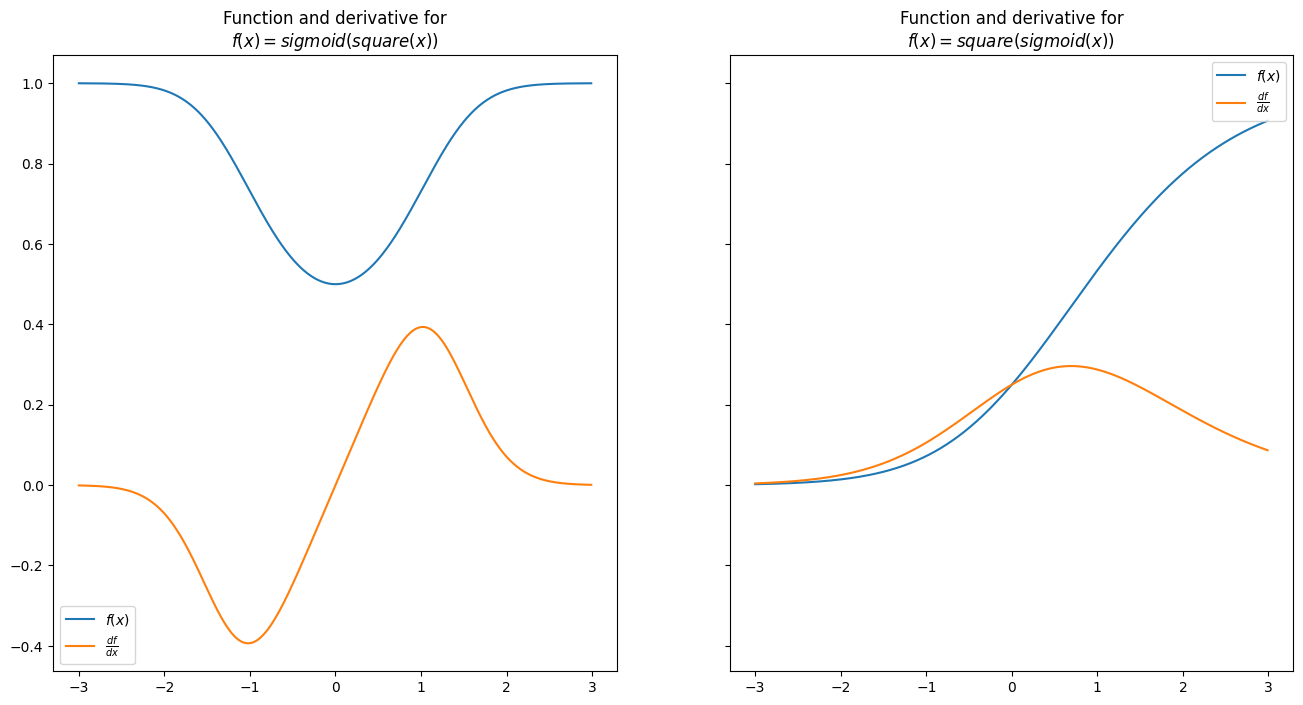

In [10]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");

# plt.savefig(IMG_FOLDER_PATH + "08_plot_chain_rule_1.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "08_plot_chain_rule_1.pdf");